In [1]:
# Only modify these two variables
batch = "batch_0000_0001/"
raterName = "Jenna Schabdach"

Rating view 1 of 90 unique views
(FYI age at scan: approximately 7.63 years)


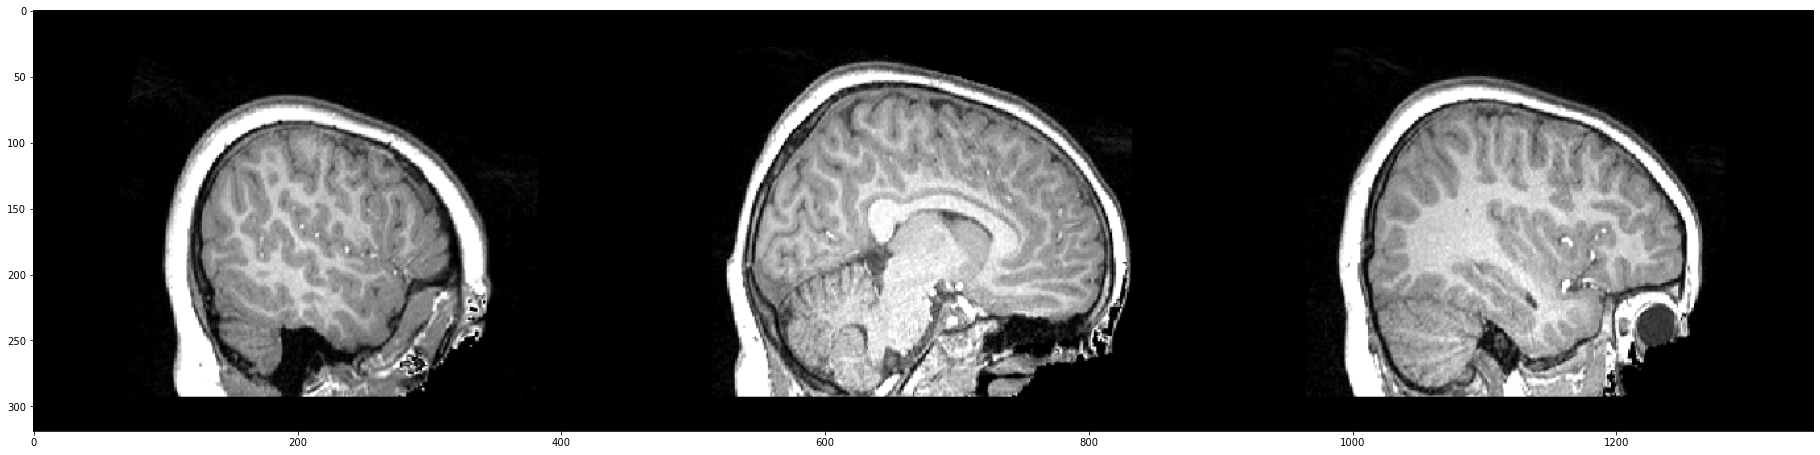

In [ ]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import clear_output

# Set up the batch data frame
# baseDir = "/home/drjennay/image_qc_pngs"
baseDir = "/Users/youngjm/Data/clip/images/qc/mpr_fs_6.0.0/"
ratingDfFn = os.path.join(baseDir, "test_ratings.csv")

# List the file names
fns = os.listdir(os.path.join(baseDir, batch))
viewIds = list(set([i.split(".png")[0][:-4] for i in fns])) 
# Shuffle the ids
random.shuffle(viewIds)

# Check if the .csv to hold the image grades exists
if os.path.exists(ratingDfFn):
    ratingDf = pd.read_csv(ratingDfFn)
# If the rating file doesn't exist, set up the columns
else:
    setup = {"batch": [batch for i in range(len(fns))],
            "png_filename": fns, 
            "subject": [i.split("_")[0] for i in fns], 
            "session": [i.split("_")[1] for i in fns],  
            "rater": [raterName for i in range(len(fns))], 
            "rater_grades": [np.nan for i in range(len(fns))]}
    ratingDf = pd.DataFrame(setup)

# The scan rating counter = the number of the scan the user is currently rating
scanRatingCounter = len(ratingDf[ratingDf['rater_grades'].notna()]['rater_grades'])+1
# for each subject
for scanView in viewIds:
    # Get the filenames
    viewFns = [i for i in fns if scanView in i]
    # display progress
    print("Rating view " + str(scanRatingCounter) + " of " + str(len(viewIds)) + " unique views")
    print("(FYI age at scan: approximately " +str(np.round(int(scanView.split("age")[-1].split('_')[0])/365.25, 2))+" years)")
    
    # load all 3 pngs
    img0 = plt.imread(os.path.join(os.path.join(baseDir, batch), viewFns[0]))
    img1 = plt.imread(os.path.join(os.path.join(baseDir, batch), viewFns[1]))
    img2 = plt.imread(os.path.join(os.path.join(baseDir, batch), viewFns[2]))
    viewImg = np.concatenate([img0, img1, img2], axis=1)
    figsize = (len(viewImg)/10, len(viewImg[0])/20)
    
    # display the png
    plt.figure(figsize=figsize)
    plt.imshow(viewImg)
    plt.show()

    # ask for a rating
    rating = ""
    while rating not in [0, 1, 2, -1]:
        rating = int(input("Grade the image on a scale of 0/1/2/-1 (aka poor quality/not sure/good quality/not a precontrast brain image): "))

    # add the rating to the dataframe
    ratingDf.loc[ratingDf['png_filename'] == viewFns[0], 'rater_grades'] = rating
    ratingDf.loc[ratingDf['png_filename'] == viewFns[1], 'rater_grades'] = rating
    ratingDf.loc[ratingDf['png_filename'] == viewFns[2], 'rater_grades'] = rating

    scanRatingCounter += 1
    # clear the screen
    clear_output()
    # save the dataframe
    ratingDf.to_csv(ratingDfFn, index=False)
